In [8]:
import pandas as pd
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from matplotlib import pyplot as pyplt

In [9]:

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table[y])/np.std(table[x])

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table[y]) - a * np.mean(table[x])

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b

def scatter_fit(table, x, y):
    plots.scatter(table[x], table[y], s=20)
    plots.plot(table[x], fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show()

### A Regression Model ###

In brief, such models say that the underlying relation between the two variables is perfectly linear; this straight line is the *signal* that we would like to identify. However, we are not able to see the line clearly. What we see are points that are scattered around the line. In each of the points, the signal has been contaminated by *random noise*. Our inferential goal, therefore, is to separate the signal from the noise.

In greater detail, the regression model specifies that the points in the scatter plot are generated at random as follows.

- The relation between $x$ and $y$ is perfectly linear. We cannot see this "true line" but it exists.
- The scatter plot is created by taking points on the line and pushing them off the line vertically, either above or below, as follows:
    - For each $x$, find the corresponding point on the true line (that's the signal), and then generate the noise or error.
    - The errors are drawn at random with replacement from a population of errors that has a normal distribution with mean 0.
    - Create a point whose horizontal coordinate is $x$ and whose vertical coordinate is "the height of the true line at $x$, plus the error".
- Finally, erase the true line from the scatter, and display just the points created.

Based on this scatter plot, how should we estimate the true line? The best line that we can put through a scatter plot is the regression line. So the regression line is a natural estimate of the true line. 

The simulation below shows how close the regression line is to the true line. The first panel shows how the scatter plot is generated from the true line. The second shows the scatter plot that we see. The third shows the regression line through the plot. The fourth shows both the regression line and the true line.

To run the simulation, call the function `draw_and_compare` with three arguments: the slope of the true line, the intercept of the true line, and the sample size.

Run the simulation a few times, with different values for the slope and intercept of the true line, and varying sample sizes. Because all the points are generated according to the model, you will see that the regression line is a good estimate of the true line if the sample size is moderately large.

In [10]:

def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = pd.DataFrame({
        'x': x,
        'y': y})

    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=20)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=20)
    plots.title('What We Get to See')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression Line: Estimate of True Line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    plots.ylabel("")
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

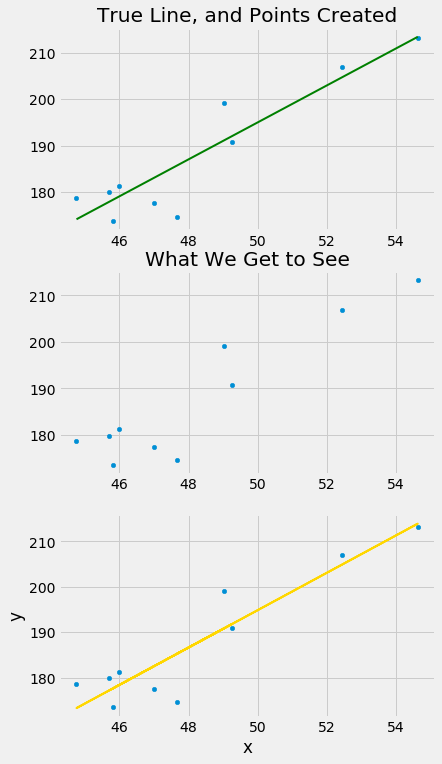

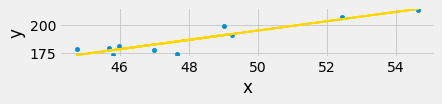

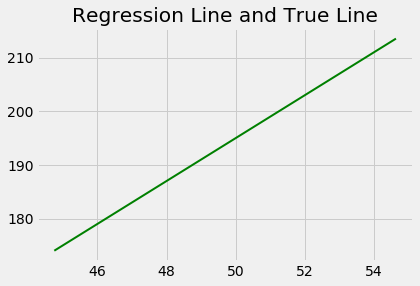

In [11]:
# The true line,
# the points created,
# and our estimate of the true line.
# Arguments: true slope, true intercept, number of points

draw_and_compare(4, -5, 10)

In reality, of course, we will never see the true line. What the simulation shows that if the regression model looks plausible, and if we have a large sample, then the regression line is a good approximation to the true line.